Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/sound'

/content/drive/My Drive/sound


In [ ]:
!ls

dataset   test.zip   train.zip	     X_train.npy     y_data.npy
Test	  Train      X_data_aug.npy  X_valid.npy     y_train.npy
test.csv  train.csv  X_data.npy      y_data_aug.npy  y_valid.npy


#Data Preparation

In [ ]:
import librosa
import pandas as pd
import glob

In [ ]:
filenames=glob.glob('Train/*')
print(len(filenames))

5435


In [ ]:
df=pd.read_csv('train.csv')
id=list(df['ID'])
labels=list(df['Class'])

In [ ]:
encoding={'air_conditioner':0,
          'car_horn':1,
          'children_playing':2,
          'dog_bark':3,
          'drilling':4,
          'engine_idling':5,
          'gun_shot':6,
          'jackhammer':7,
          'siren':8,
          'street_music':9}

In [ ]:
! pip install nlpaug

     |████████████████████████████████| 389kB 7.8MB/s 


In [ ]:
from nlpaug.augmenter.audio.audio_augmenter import AudioAugmenter
from nlpaug.augmenter.audio.noise import NoiseAug
from nlpaug.augmenter.audio.shift import ShiftAug
from nlpaug.augmenter.audio.speed import SpeedAug
from nlpaug.augmenter.audio.noise import NoiseAug
from nlpaug.augmenter.audio.pitch import PitchAug
from nlpaug.augmenter.audio.loudness import LoudnessAug
from nlpaug.augmenter.audio.crop import CropAug
from nlpaug.augmenter.audio.mask import MaskAug
from nlpaug.augmenter.audio.vtlp import VtlpAug
import nlpaug.augmenter.audio as naa

In [ ]:
#m_train=4400
#m_valid=1035
n_mfcc=128

In [ ]:
m_train=5435

In [ ]:
print('Train/{:04d}.wav'.format(10))

Train/0010.wav


902


In [ ]:
tic=time.time()
X_data=np.zeros([6*m_train,n_mfcc,200])
y_data=np.zeros([6*m_train,1])

i=0
while i<m_train :
  data,sr=librosa.load(f'Train/{id[i]}.wav')
  noise_aug = NoiseAug()
  pitch_aug = PitchAug(sampling_rate=sr)
  shift_aug = ShiftAug(sampling_rate=sr)
  speed_aug = SpeedAug()
  augs=[noise_aug,pitch_aug,shift_aug,speed_aug]
  for k in range(6):
    j=k%3
    aug=augs[j].augment(data)
    mfccs=librosa.feature.mfcc(aug,sr=sr,n_mfcc=n_mfcc)
    X_data[6*i+k][:,:mfccs.shape[1]]=mfccs
    y_data[6*i+k]=encoding[labels[i]]
  i+=1
  print(i)

np.save('X_data_aug1',X_data)
np.save('y_data_aug1',y_data)

toc=time.time()
t=toc-tic
print(t/3600,(t%60)/60,t%3600)

Streaming output truncated to the last 5000 lines.
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
6

In [ ]:
# X_train=np.zeros([m_train,n_mfcc])
# y_train=np.zeros([m_train,1])

# i=0
# while i<m_train :
#  data,sr=librosa.load(f'Train/{id[i]}.wav')
#  mfccs=librosa.feature.mfcc(data,sr=sr,n_mfcc=n_mfcc)
#  X_train[i]=np.mean(mfccs.T,axis=0)
#  y_train[i]=encoding[labels[i]]
#  i+=1
#  print(i)

# print('done')

# X_valid=np.zeros([m_valid,n_mfcc])
# y_valid=np.zeros([m_valid,1])

# while i<m_train+m_valid :
#  data,sr=librosa.load(f'Train/{id[i]}.wav')
#  mfccs=librosa.feature.mfcc(data,sr=sr,n_mfcc=n_mfcc)
#  X_valid[i]=np.mean(mfccs.T,axis=0)
#  y_valid[i]=encoding[labels[i]]
#  i+=1  

In [ ]:
while i<m_train+m_valid :
 data,sr=librosa.load(f'Train/{id[i]}.wav')
 mfccs=librosa.feature.mfcc(data,sr=sr,n_mfcc=n_mfcc)
 X_valid[i-m_train]=np.mean(mfccs.T,axis=0)
 y_valid[i-m_train]=encoding[labels[i]]
 i+=1 

In [ ]:
np.save('X_train',X_train)
np.save('y_train',y_train)
np.save('X_valid',X_valid)
np.save('y_valid',X_valid)

In [ ]:
if len(X_data)>0:
  np.save('X_data',X_data)
  np.save('y_data',y_data)

In [ ]:
print(len(X_data),len(y_data))

5435 5435


#Model

In [ ]:
# X_train=np.load('X_train.npy')
# y_train=np.load('y_train.npy')
# X_valid=np.load('X_valid.npy')
# X_valid=np.load('y_valid.npy')

In [ ]:
X_train=tf.keras.backend.expand_dims(np.load('X_data_aug1.npy')[:,:,:173],axis=-1)
y_train=np.load('y_data_aug1.npy')

In [ ]:
X_valid=tf.keras.backend.expand_dims(np.load('X_complete_new.npy')[:,:,:173],axis=-1)
y_valid=np.load('y_complete_new.npy')

In [ ]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(32610, 128, 173, 1) (32610, 1) (8732, 128, 173, 1) (8732, 1)


In [ ]:
# X_train=tf.keras.backend.expand_dims(X_data[:-5000,:,:173],axis=-1)
# y_train=y_data[:-5000]
# X_valid=tf.keras.backend.expand_dims(X_data[-5000:,:,:173],axis=-1)
# y_valid=y_data[-5000:]

In [ ]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(126,171,3),include_top=False)
base_model.trainable=True
model=tf.keras.Sequential([
    Conv2D(filters=3, kernel_size=3, input_shape=(128, 173, 1)),
    LeakyReLU(),
    base_model,
    Flatten(),
    #Dropout(0.5),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 171, 3)       30        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 126, 171, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 4, 6, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 30720)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                307210    
Total params: 2,565,224
Trainable params: 2,531,112
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
class CustomLoss(tf.keras.losses.Loss):
    def __init__(self,name="custom_loss"):
        super().__init__(name=name)
        #self.sample_weights=sample_weights

    def call(self, y_true, y_pred):
        scce=tf.keras.losses.SparseCategoricalCrossentropy()
        #y_pred=tf.math.exp(y_pred)
        cce=tf.keras.losses.CategoricalCrossentropy()
        bce=tf.keras.losses.BinaryCrossentropy()
        hinge=tf.keras.losses.CategoricalHinge()
        return scce(y_true,y_pred)+0*hinge(y_true,y_pred)

In [ ]:
name='3'
model = tf.keras.Sequential(name=name)
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(128, 173, 1)))
model.add(LeakyReLU())
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3))
model.add(LeakyReLU())
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3))
model.add(LeakyReLU())
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3))
model.add(LeakyReLU())
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.2))
#model.add(GlobalAveragePooling2D())

# model.add(Conv2D(filters=128, kernel_size=3))
# model.add(LeakyReLU())
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(64))
model.add(LeakyReLU())
#model.add(Dropout(0.5))

#model.add(Dense(128))
#model.add(LeakyReLU())

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adagrad',loss=CustomLoss(),metrics=['accuracy'])

model.summary()

Model: "3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 171, 32)      320       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 126, 171, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 85, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 83, 64)        18496     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 61, 83, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 41, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 39, 64)        36928     

In [ ]:
epochs=50
BATCH_SIZE=64

checkpointer = ModelCheckpoint(filepath=f'saved_models/weights.best.{name}.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train,
                  y_train,
                  batch_size=BATCH_SIZE,
                  epochs=epochs,
                  validation_data=(X_valid,y_valid),
                  callbacks=[checkpointer])

Epoch 1/50
510/510 [==============================] - 16s 29ms/step - loss: 1.9029 - accuracy: 0.3079 - val_loss: 1.5056 - val_accuracy: 0.4565

Epoch 00001: val_loss improved from inf to 1.50564, saving model to saved_models/weights.best.3.hdf5
Epoch 2/50
510/510 [==============================] - 15s 29ms/step - loss: 1.2317 - accuracy: 0.5771 - val_loss: 0.9393 - val_accuracy: 0.6825

Epoch 00002: val_loss improved from 1.50564 to 0.93931, saving model to saved_models/weights.best.3.hdf5
Epoch 3/50
510/510 [==============================] - 15s 29ms/step - loss: 0.9924 - accuracy: 0.6634 - val_loss: 0.8456 - val_accuracy: 0.7298

Epoch 00003: val_loss improved from 0.93931 to 0.84558, saving model to saved_models/weights.best.3.hdf5
Epoch 4/50
510/510 [==============================] - 15s 29ms/step - loss: 0.8582 - accuracy: 0.7093 - val_loss: 0.7421 - val_accuracy: 0.7645

Epoch 00004: val_loss improved from 0.84558 to 0.74210, saving model to saved_models/weights.best.3.hdf5
Epoc

Text(0.5, 1.0, 'Training and Validation Accuracy')

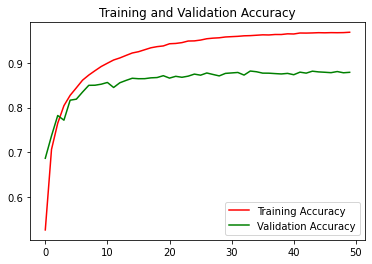

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs_range=range(epochs)
plt.plot(epochs_range, acc, label='Training Accuracy',color='red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',color='green')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_valid, y_valid, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9409077167510986
Testing Accuracy:  0.867040753364563


In [ ]:
predictions=model.predict(X_valid).astype(float)
tf.math.confusion_matrix(y_valid.reshape(len(y_valid),),np.argmax(predictions,axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[25,  0,  2,  0,  3, 51,  0, 10,  6,  2],
       [ 0,  4,  0,  3,  6,  1, 12, 16,  8, 18],
       [18,  0, 31,  6,  4,  3,  0,  8, 22, 10],
       [ 5,  0, 13, 45,  7, 10, 15,  6, 11,  8],
       [ 6,  0,  4,  1, 53,  8,  7, 29,  2, 12],
       [15,  0,  8,  2,  0, 78,  0, 13,  0,  5],
       [ 0,  0,  0, 10,  1,  2, 16,  8,  0,  0],
       [ 1,  0,  0,  0, 13, 22,  0, 75,  0,  1],
       [10,  0,  4,  4,  1,  3,  1,  6, 70, 14],
       [ 8,  1, 15,  2,  1, 15,  0,  9, 10, 45]], dtype=int32)>

In [ ]:
def confusion_matrix_info(y_true, y_pred, labels=['air_conditioner',
          'car_horn',
          'children_playing',
          'dog_bark',
          'drilling',
          'engine_idling',
          'gun_shot',
          'jackhammer',
          'siren',
          'street_music'],
                          title='confusion matrix'):
    import seaborn as sns
    import pandas as pd
    from sklearn.metrics import confusion_matrix, f1_score
    import matplotlib.pyplot as plt
    C2 = confusion_matrix(y_true, y_pred)
    C = pd.DataFrame(C2, columns=labels, index=labels)
    m, _ = C2.shape
    for i in range(m):
        precision = C2[i, i] / sum(C2[:, i])
        recall = C2[i, i] / sum(C2[i, :])
        f1 = 2 * precision * recall / (precision + recall)
        print('In class {}:\t total samples: {}\t true predict samples: {}\t'
              'acc={:.4f},\trecall={:.4f},\tf1-score={:.4f}'.format(
            labels[i], sum(C2[i, :]), C2[i, i], precision, recall, f1))
    print('-' * 100, '\n', 'average f1={:.4f}'.format(f1_score(y_true, y_pred, average='micro')))
 
    f, ax = plt.subplots()
    sns.heatmap(C, annot=True, ax=ax, cmap=plt.cm.binary)

In [ ]:
y_pred=model.predict(X_valid).astype(float)
#confusion_matrix_info()

In class air_conditioner:	 total samples: 1000	 true predict samples: 786	acc=0.8571,	recall=0.7860,	f1-score=0.8200
In class car_horn:	 total samples: 429	 true predict samples: 413	acc=0.9077,	recall=0.9627,	f1-score=0.9344
In class children_playing:	 total samples: 1000	 true predict samples: 851	acc=0.8939,	recall=0.8510,	f1-score=0.8719
In class dog_bark:	 total samples: 1000	 true predict samples: 886	acc=0.9022,	recall=0.8860,	f1-score=0.8940
In class drilling:	 total samples: 1000	 true predict samples: 853	acc=0.8504,	recall=0.8530,	f1-score=0.8517
In class engine_idling:	 total samples: 1000	 true predict samples: 904	acc=0.8577,	recall=0.9040,	f1-score=0.8802
In class gun_shot:	 total samples: 374	 true predict samples: 348	acc=0.9721,	recall=0.9305,	f1-score=0.9508
In class jackhammer:	 total samples: 1000	 true predict samples: 932	acc=0.8028,	recall=0.9320,	f1-score=0.8626
In class siren:	 total samples: 929	 true predict samples: 840	acc=0.9231,	recall=0.9042,	f1-score=0

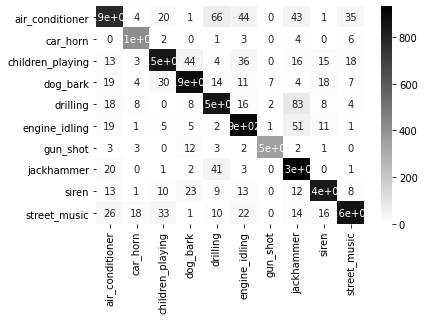

In [ ]:
confusion_matrix_info(y_valid, np.argmax(y_pred, axis=1),title='confusion_matrix_train')